In [2]:
import numpy as np

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
dir = os.getcwd()
# Get a list of CSV file paths
dfs = pd.DataFrame()
# deg_res=1
src_path = "../Src/"
data_path = "../Measurement/"
cora_path = "../CORA-Z7/"
setup_path = "../Setup/"
import sys
sys.path.insert(1, src_path)
sys.path.insert(2, cora_path)
sys.path.insert(2, setup_path)
sys.path.insert(2, data_path)
from array_process import *

In [6]:
RX_cal_p90tn30={
 0:  [0,0,90,0,90,180,270,180],
 1:  [90,180, 270, 180, 270, 0, 90,0],
 2:  [90,180, 270, 180, 270, 0, 90,0],
 3:  [270,0,90,0,90,180,270,180],
 4:  [270,0,90,0,90,180,270,180],
 5:  [90,180, 270, 180, 270, 0, 90,0],
 6:  [90,180, 270, 180, 270, 0, 90,0],
 7:  [270,0,90,0,90,180,270,180],
 8:  [270,0,90,0,90,180,270,180],
 9:  [90,180, 270, 180, 270, 0, 90,0],
 10: [90,180, 270, 180, 270, 0, 90,0],
 11: [270,0,90,0,90,180,270,180],
 12: [90,180, 270, 180, 270, 0, 90,0],
 13: [270,0,90,0,90,180,270,180],
 14: [270,0,90,0,90,180,270,180],
 15: [90,180, 270, 180, 270, 0, 90,0]}
phase_h1 = {0: [89.1157608032, 41.8553581238, -108.994644165, -16.9954032898], 1: [111.095001221, 90.5362472534, -26.0088157654, -108.148292542], 2: [119.278404236, 97.7372589111, 26.823431015, -114.244491577], 3: [140.140609741, 95.4913024902, -24.0808849335, 5.58247423172], 4: [-162.912872314, 172.093505859, 53.1560401917, -126.679611206], 5: [-97.5960083008, 111.114738464, 17.4272251129, -20.1549243927], 6: [-174.241653442, 102.113792419, 45.1254272461, 7.35892438889], 7: [173.412109375, -170.839385986, -5.09441423416, -115.823600769], 8: [153.282913208, 136.153503418, -64.1837692261, -166.261856079], 9: [177.162109375, 96.1847229004, 39.3089065552, 3.73414850235], 10: [162.341079712, 93.6926040649, -20.7520198822, 12.5270347595], 11: [117.39704895, 171.52671814, -39.9154777527, -138.327209473], 12: [104.940490723, 67.9227218628, -92.9712677002, 28.1047840118], 13: [52.979095459, 114.856300354, -32.3234481812, -124.86580658], 14: [86.546875, 85.8600158691, -25.1502399445, -61.8383522034], 15: [133.522262573, 96.0971832275, -16.7827625275, -21.7925262451]}
phase_v1 = {0: [-157.744842529, -81.4177093506, -104.309494019, 168.668457031], 1: [109.570121765, 10.4212379456, 59.9170761108, 147.195419312], 2: [73.7085876465, 37.5496025085, 38.5817108154, 129.646392822], 3: [-164.649887085, -63.9218978882, -76.9128799438, -162.453689575], 4: [101.72215271, 100.011390686, 65.950881958, 101.006462097], 5: [-151.795196533, 0.482258737087, 33.404083252, -113.525665283], 6: [-110.694778442, 28.8544101715, 26.2893562317, -74.2607727051], 7: [89.6101074219, 81.8919219971, 74.5754928589, 110.577232361], 8: [56.1997032166, 39.40102005, 29.4451065063, 71.0542221069], 9: [-148.282073975, 29.084028244, 3.79954075813, -79.7802429199], 10: [-152.157012939, 40.2574882507, -21.4759311676, -88.5695800781], 11: [100.606880188, 62.4893264771, 40.7619247437, 88.7646713257], 12: [-149.439529419, -78.780921936, -62.2294578552, -149.49307251], 13: [78.0486602783, 62.3001899719, 42.7022895813, 114.664085388], 14: [86.4322967529, 62.2261390686, 56.227722168, 144.88885498], 15: [-152.87600708, -82.148147583, -107.892852783, 176.034576416]}
phase_h2 = {0: [39.2654914856, 26.5567932129, 34.4164428711, 27.6758728027], 1: [39.3880958557, 39.3418235779, 32.056640625, 40.6064529419], 2: [42.4375648499, 43.6843261719, 18.997385025, 42.4625053406], 3: [30.4495639801, 28.3545532227, 20.2183818817, 23.3744621277], 4: [39.0183143616, 41.8143081665, 31.5158138275, 48.8303337097], 5: [42.4320907593, 39.3899421692, 27.56300354, 24.1334018707], 6: [70.6131515503, 53.0371017456, 25.3682575226, 26.9306087494], 7: [52.691368103, 27.4271183014, 24.188873291, 47.1667900085], 8: [40.7011260986, 38.3175582886, 31.5911045074, 59.0376358032], 9: [38.4160270691, 35.7807807922, 22.7573661804, 25.150888443], 10: [38.4082221985, 36.9196205139, 24.2427845001, 28.5990886688], 11: [23.8745155334, 30.1464672089, 25.103685379, 52.3907928467], 12: [49.3265762329, 35.4534263611, 37.6007614136, 29.8240756989], 13: [24.2186317444, 41.2691497803, 18.1024436951, 51.1013793945], 14: [38.2616691589, 45.148021698, 25.0606517792, 44.6761016846], 15: [31.4361343384, 29.1608104706, 26.5825653076, 18.085226059]}
phase_v2 = {0: [18.1870174408, 12.4871873856, 12.0176239014, 29.2422161102], 1: [33.0115966797, 17.8495349884, 30.7931079865, 37.9465713501], 2: [28.4676380157, 44.6343650818, 29.7362632751, 45.4501419067], 3: [28.9898529053, 20.8293647766, 22.5956287384, 46.9511108398], 4: [25.7942733765, 38.5626449585, 32.6459159851, 29.3873081207], 5: [26.8659515381, 22.2571849823, 21.2987670898, 25.3632984161], 6: [24.6067447662, 41.1075668335, 27.7677783966, 22.0969963074], 7: [32.7808990479, 37.8865318298, 31.026008606, 34.9139671326], 8: [25.8305206299, 33.9196166992, 27.3981971741, 30.1215057373], 9: [38.8285102844, 33.4123497009, 33.6699562073, 27.5820789337], 10: [32.7796287537, 53.3547058105, 26.3614597321, 36.0002288818], 11: [19.4234199524, 36.9872093201, 29.6953716278, 29.269405365], 12: [31.4071769714, 23.6151542664, 16.2620697021, 45.4640884399], 13: [21.0470218658, 43.7559280396, 31.4578495026, 38.7604866028], 14: [32.0808486938, 37.1328887939, 31.3614616394, 38.0744247437], 15: [37.9328956604, 48.1423721313, 28.5117912292, 48.4299850464]}

for i in range(16):
    for j in range(4):
        RX_cal_p90tn30[i][2*j]=round((-phase_v1[i][j]-phase_v2[i][j])%360,0)
        RX_cal_p90tn30[i][2*j+1]=round((-phase_h1[i][j]-phase_h2[i][j])%360,0)
RX_cal_p90tn30

{0: [140.0, 232.0, 69.0, 292.0, 92.0, 75.0, 162.0, 349.0],
 1: [217.0, 210.0, 332.0, 230.0, 269.0, 354.0, 175.0, 68.0],
 2: [258.0, 198.0, 278.0, 219.0, 292.0, 314.0, 185.0, 72.0],
 3: [136.0, 189.0, 43.0, 236.0, 54.0, 4.0, 116.0, 331.0],
 4: [232.0, 124.0, 221.0, 146.0, 261.0, 275.0, 230.0, 78.0],
 5: [125.0, 55.0, 337.0, 209.0, 305.0, 315.0, 88.0, 356.0],
 6: [86.0, 104.0, 290.0, 205.0, 306.0, 290.0, 52.0, 326.0],
 7: [238.0, 134.0, 240.0, 143.0, 254.0, 341.0, 215.0, 69.0],
 8: [278.0, 166.0, 287.0, 186.0, 303.0, 33.0, 259.0, 107.0],
 9: [109.0, 144.0, 298.0, 228.0, 323.0, 298.0, 52.0, 331.0],
 10: [119.0, 159.0, 266.0, 229.0, 355.0, 357.0, 53.0, 319.0],
 11: [240.0, 219.0, 261.0, 158.0, 290.0, 15.0, 242.0, 86.0],
 12: [118.0, 206.0, 55.0, 257.0, 46.0, 55.0, 104.0, 302.0],
 13: [261.0, 283.0, 254.0, 204.0, 286.0, 14.0, 207.0, 74.0],
 14: [241.0, 235.0, 261.0, 229.0, 272.0, 0.0, 177.0, 17.0],
 15: [115.0, 195.0, 34.0, 235.0, 79.0, 350.0, 136.0, 4.0]}

In [9]:
RX_p90tn30_idealshift={
 0:  [0,0,90,0,90,180,270,180],
 1:  [90,180, 270, 180, 270, 0, 90,0],
 2:  [90,180, 270, 180, 270, 0, 90,0],
 3:  [270,0,90,0,90,180,270,180],
 4:  [270,0,90,0,90,180,270,180],
 5:  [90,180, 270, 180, 270, 0, 90,0],
 6:  [90,180, 270, 180, 270, 0, 90,0],
 7:  [270,0,90,0,90,180,270,180],
 8:  [270,0,90,0,90,180,270,180],
 9:  [90,180, 270, 180, 270, 0, 90,0],
 10: [90,180, 270, 180, 270, 0, 90,0],
 11: [270,0,90,0,90,180,270,180],
 12: [90,180, 270, 180, 270, 0, 90,0],
 13: [270,0,90,0,90,180,270,180],
 14: [270,0,90,0,90,180,270,180],
 15: [90,180, 270, 180, 270, 0, 90,0]}
for i in range(16):
    for j in range(4):
        RX_p90tn30_idealshift[i][2*j]=round(RX_phase_table(90,-30)[0][i][j]%360,0)
        RX_p90tn30_idealshift[i][2*j+1]=round(RX_phase_table(90,-30)[1][i][j]%360,0)
RX_p90tn30_idealshift


{0: [104.0, 142.0, 176.0, 35.0, 158.0, 245.0, 95.0, 356.0],
 1: [5.0, 66.0, 249.0, 111.0, 282.0, 345.0, 345.0, 241.0],
 2: [26.0, 69.0, 282.0, 173.0, 301.0, 333.0, 14.0, 268.0],
 3: [131.0, 136.0, 169.0, 353.0, 162.0, 245.0, 106.0, 354.0],
 4: [279.0, 314.0, 302.0, 188.0, 317.0, 20.0, 251.0, 117.0],
 5: [182.0, 207.0, 44.0, 300.0, 75.0, 141.0, 149.0, 58.0],
 6: [109.0, 165.0, 25.0, 253.0, 35.0, 104.0, 120.0, 20.0],
 7: [248.0, 308.0, 295.0, 176.0, 281.0, 6.0, 245.0, 94.0],
 8: [275.0, 319.0, 318.0, 178.0, 330.0, 67.0, 278.0, 127.0],
 9: [124.0, 168.0, 22.0, 266.0, 25.0, 105.0, 98.0, 9.0],
 10: [104.0, 169.0, 37.0, 259.0, 23.0, 105.0, 92.0, 27.0],
 11: [269.0, 309.0, 285.0, 173.0, 282.0, 35.0, 258.0, 109.0],
 12: [185.0, 224.0, 66.0, 299.0, 69.0, 134.0, 128.0, 36.0],
 13: [311.0, 334.0, 324.0, 208.0, 4.0, 70.0, 262.0, 166.0],
 14: [70.0, 313.0, 340.0, 201.0, 350.0, 52.0, 273.0, 202.0],
 15: [199.0, 253.0, 82.0, 251.0, 87.0, 130.0, 175.0, 14.0]}

<function matplotlib.pyplot.show(close=None, block=None)>

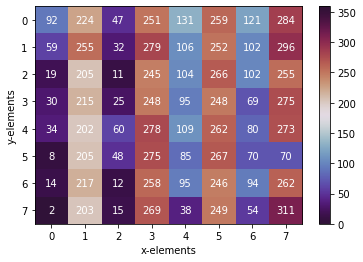

In [3]:
phase_h = {0: [-4.40529155731, -0.926823914051, -2.96531939507, 4.52556085587], 1: [1.87916195393, 2.87021398544, -6.51562356949, 4.85816812515], 2: [1.80557119846, -0.867202341557, -3.74090003967, 3.35832571983], 3: [-4.91922283173, 7.25513362885, -1.33811426163, 1.30312871933], 4: [-1.25587260723, 1.15512382984, 3.96253728867, -3.57571864128], 5: [0.208869814873, 4.12164115906, -1.15574073792, -2.87169647217], 6: [-1.50566053391, 2.44649481773, 0.169996082783, 9.274933815], 7: [-2.6832139492, 4.03855133057, 3.1891617775, -3.38476872444], 8: [2.98869538307, 1.88686180115, 5.5344414711, 6.44631719589], 9: [0.107921503484, -0.131574511528, 3.04682421684, 4.84040594101], 10: [4.57360553741, -4.76115989685, -0.462217748165, 4.73173332214], 11: [0.449895977974, 0.260628253222, 0.727855145931, -0.600505232811], 12: [2.12006425858, 4.00828647614, 1.34917867184, 3.017162323], 13: [2.87807035446, 1.31707406044, 8.44613933563, -0.386419594288], 14: [-1.27056384087, 2.54319167137, -3.7031223774, 0.902983367443], 15: [-0.283941447735, 0.385773271322, -4.27342367172, 5.72706031799]}
phase_v = {0: [-5.2325758934, 6.30412054062, -4.54858207703, -2.06370973587], 1: [-5.07376861572, -2.07296872139, 1.37176942825, 1.17311680317], 2: [6.45068502426, 1.4790661335, 7.86583042145, 6.70795106888], 3: [3.28073263168, 1.25920796394, -0.331973046064, 1.75113451481], 4: [-2.49899983406, 6.90822935104, -0.466220498085, 2.12935209274], 5: [-5.46761655807, 0.947724282742, -0.615834593773, -1.22743904591], 6: [2.01935172081, 1.35157752037, 0.162884831429, 5.0529050827], 7: [0.598595499992, -0.438187509775, -2.1997461319, 0.582134604454], 8: [0.00224213930778, 3.5271654129, 2.37721896172, 4.01920366287], 9: [-1.92894697189, 1.36003482342, 6.42185544968, -1.02524375916], 10: [0.568206608295, 6.04965257645, -3.86119484901, 0.192858293653], 11: [2.44465517998, 7.03279876709, -1.92812824249, 3.06439089775], 12: [2.18944311142, 4.2065577507, 6.93922185898, -0.885367870331], 13: [8.44717025757, 2.25907588005, 1.45609402657, 3.23964357376], 14: [-14.2452898026, -0.483220845461, 0.480208396912, 2.24326848984], 15: [3.69531154633, 1.17611610889, 4.26341629028, 1.16256773472]}

RX_cal1={
 0: [104.0, 142.0, 266.0, 125.0, 248.0, 335.0, 95.0, 356.0],
 1: [275.0, 336.0, 69.0, 291.0, 102.0, 165.0, 255.0, 151.0],
 2: [296.0, 339.0, 102.0, 353.0, 121.0, 153.0, 284.0, 178.0],
 3: [131.0, 136.0, 259.0, 83.0, 252.0, 335.0, 106.0, 354.0],
 4: [279.0, 314.0, 32.0, 278.0, 47.0, 110.0, 251.0, 117.0],
 5: [92.0, 117.0, 224.0, 120.0, 255.0, 321.0, 59.0, 328.0],
 6: [19.0, 75.0, 205.0, 73.0, 215.0, 284.0, 30.0, 290.0],
 7: [248.0, 308.0, 25.0, 266.0, 11.0, 96.0, 245.0, 94.0],
 8: [275.0, 319.0, 48.0, 268.0, 60.0, 157.0, 278.0, 127.0],
 9: [34.0, 78.0, 202.0, 86.0, 205.0, 285.0, 8.0, 279.0],
 10: [14.0, 79.0, 217.0, 79.0, 203.0, 285.0, 2.0, 297.0],
 11: [269.0, 309.0, 15.0, 263.0, 12.0, 125.0, 258.0, 109.0],
 12: [95.0, 134.0, 246.0, 119.0, 249.0, 314.0, 38.0, 306.0],
 13: [311.0, 334.0, 54.0, 298.0, 94.0, 160.0, 262.0, 166.0],
 14: [70.0, 313.0, 70.0, 291.0, 80.0, 142.0, 273.0, 202.0],
 15: [109.0, 163.0, 262.0, 71.0, 267.0, 310.0, 85.0, 284.0]}
RX_cal1=RX_p90tn30_idealshift
for i in range(16):
    for j in range(4):
        phase_v[i][j]=(RX_cal1[i][2*j])%360
        phase_h[i][j]=(RX_cal1[i][2*j+1])%360
ant_scan=phase_v

array_2d = np.array([
    [0.01,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01],
    [180.01,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ],
    [0.01,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01],
    [180.01,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ],
    [0.01,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01],
    [180.01,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ],
    [0.01,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01],
    [180.01,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ]])




array_2d[0][0]=ant_scan[ 5][0];array_2d[0][1]=ant_scan[ 5][1];array_2d[1][1]=ant_scan[ 5][2];array_2d[1][0]=ant_scan[ 5][3]
array_2d[2][0]=ant_scan[ 6][0];array_2d[2][1]=ant_scan[ 6][1];array_2d[3][1]=ant_scan[ 6][2];array_2d[3][0]=ant_scan[ 6][3]
array_2d[4][0]=ant_scan[ 9][0];array_2d[4][1]=ant_scan[ 9][1];array_2d[5][1]=ant_scan[ 9][2];array_2d[5][0]=ant_scan[ 9][3]
array_2d[6][0]=ant_scan[10][0];array_2d[6][1]=ant_scan[10][1];array_2d[7][1]=ant_scan[10][2];array_2d[7][0]=ant_scan[10][3]

array_2d[1][3]=ant_scan[ 4][0];array_2d[1][2]=ant_scan[ 4][1];array_2d[0][2]=ant_scan[ 4][2];array_2d[0][3]=ant_scan[ 4][3]
array_2d[3][3]=ant_scan[ 7][0];array_2d[3][2]=ant_scan[ 7][1];array_2d[2][2]=ant_scan[ 7][2];array_2d[2][3]=ant_scan[ 7][3]
array_2d[5][3]=ant_scan[ 8][0];array_2d[5][2]=ant_scan[ 8][1];array_2d[4][2]=ant_scan[ 8][2];array_2d[4][3]=ant_scan[ 8][3]
array_2d[7][3]=ant_scan[11][0];array_2d[7][2]=ant_scan[11][1];array_2d[6][2]=ant_scan[11][2];array_2d[6][3]=ant_scan[11][3]

array_2d[0][4]=ant_scan[ 3][0];array_2d[0][5]=ant_scan[ 3][1];array_2d[1][5]=ant_scan[ 3][2];array_2d[1][4]=ant_scan[ 3][3]
array_2d[2][4]=ant_scan[ 0][0];array_2d[2][5]=ant_scan[ 0][1];array_2d[3][5]=ant_scan[ 0][2];array_2d[3][4]=ant_scan[ 0][3]
array_2d[4][4]=ant_scan[15][0];array_2d[4][5]=ant_scan[15][1];array_2d[5][5]=ant_scan[15][2];array_2d[5][4]=ant_scan[15][3]
array_2d[6][4]=ant_scan[12][0];array_2d[6][5]=ant_scan[12][1];array_2d[7][5]=ant_scan[12][2];array_2d[7][4]=ant_scan[12][3]

array_2d[1][7]=ant_scan[ 2][0];array_2d[1][6]=ant_scan[ 2][1];array_2d[0][6]=ant_scan[ 2][2];array_2d[0][7]=ant_scan[ 2][3]
array_2d[3][7]=ant_scan[ 1][0];array_2d[3][6]=ant_scan[ 1][1];array_2d[2][6]=ant_scan[ 1][2];array_2d[2][7]=ant_scan[ 1][3]
array_2d[5][7]=ant_scan[14][0];array_2d[5][6]=ant_scan[14][1];array_2d[4][6]=ant_scan[14][2];array_2d[4][7]=ant_scan[14][3]
array_2d[7][7]=ant_scan[13][0];array_2d[7][6]=ant_scan[13][1];array_2d[6][6]=ant_scan[13][2];array_2d[6][7]=ant_scan[13][3]
array_2d = array_2d%360

plt.imshow(array_2d, cmap='twilight_shifted', aspect='auto',vmin=0,vmax = 359, interpolation='nearest')
# plt.imshow(array_2d, cmap='twilight_shifted', aspect='auto',vmin=-100,vmax = 100, interpolation='nearest')
for i in range(8):
    for j in range(8):
        plt.annotate(f'{array_2d[i, j]:.0f}', xy=(j, i), ha='center', va='center', color='white')

# plt.axis('off')
colorbar= plt.colorbar()
plt.xlabel('x-elements')
plt.ylabel('y-elements')

plt.show
